# CSE 4510 Activity 1 - Pandas EDA
**Name: Autumn Monsees** | Due: Sunday, Sept 18, 2022

### Preamble

Import pandas

In [1]:
import pandas as pd

### Question 1 - Reading the Data

a) Load the dataset using pandas

In [2]:
data = pd.DataFrame(pd.read_csv('rollingsales_brooklyn.csv', skiprows=4))

b) Display the shape of the data to make sure it was read

In [3]:
data.shape

(23373, 21)

c) Display the first 2 rows

In [4]:
data.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$403,572",7/9/13
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$218,010",7/12/13


d) Display row 14 to see the field names clearly

In [5]:
data.iloc[14]

BOROUGH                                                                      3
NEIGHBORHOOD                                         BATH BEACH               
BUILDING CLASS CATEGORY                                                       
TAX CLASS AT PRESENT                                                         4
BLOCK                                                                     6370
LOT                                                                       1321
EASE-MENT                                                                     
BUILDING CLASS AT PRESENT                                                   RP
ADDRESS                             98 BAY 20TH   STREET                      
APART\nMENT\nNUMBER                                               P1          
ZIP CODE                                                                 11214
RESIDENTIAL UNITS                                                            0
COMMERCIAL UNITS                                    

### Question 2 - Reformatting Column Labels

a) Convert the column names to lower case

In [6]:
data.columns = [c.lower() for c in data.columns]

b) Replace the '\n' in the column names with space

In [7]:
data.columns = [c.replace('\n', ' ') for c in data.columns]

c) Replace the spaces in the column names with underscores

In [8]:
data.columns = [c.replace(' ', '_') for c in data.columns]

d) Display row 14 again to see the change in the field names

In [9]:
data.iloc[14]

borough                                                                      3
neighborhood                                         BATH BEACH               
building_class_category                                                       
tax_class_at_present                                                         4
block                                                                     6370
lot                                                                       1321
ease-ment                                                                     
building_class_at_present                                                   RP
address                             98 BAY 20TH   STREET                      
apart_ment_number                                                 P1          
zip_code                                                                 11214
residential_units                                                            0
commercial_units                                    

### Question 3 - Convert the field "sale_price" to numeric

In [10]:
no_dollar = lambda x: str(x).replace('$', '')
no_comma = lambda x: str(x).replace(',', '')
price_to_number = lambda x: no_dollar(no_comma(x))

In [11]:
data['sale_price'] = pd.to_numeric(data['sale_price'].apply(price_to_number))

In [12]:
print(data['sale_price'])

0         403572
1         218010
2         952311
3         842692
4         815288
          ...   
23368          0
23369          0
23370    1090000
23371          0
23372          0
Name: sale_price, Length: 23373, dtype: int64


### Question 4 - Display a count of missing sale prices

In [13]:
data['sale_price'].where(data['sale_price']!=0).isnull().sum()

8791

### Question 5 - Convert 'land_square_feet' to numeric

In [14]:
data['land_square_feet'] = pd.to_numeric(data['land_square_feet'].apply(no_comma))

### Question 6 - Convert “gross_square_feet” to numeric, “sale_date” to datetime, “year_built” to numeric (int32), and “zip_code” to string


In [15]:
data['gross_square_feet'] = pd.to_numeric(data['gross_square_feet'].apply(no_comma))

In [16]:
data['sale_date'] = pd.to_datetime(data['sale_date'])

In [17]:
data['year_built'] = data['year_built'].astype('int32')

In [18]:
data['zip_code'] = data['zip_code'].astype('str')

In [19]:
data.dtypes

borough                                    int64
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
block                                      int64
lot                                        int64
ease-ment                                 object
building_class_at_present                 object
address                                   object
apart_ment_number                         object
zip_code                                  object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                           int64
gross_square_feet                          int64
year_built                                 int32
tax_class_at_time_of_sale                  int64
building_class_at_time_of_sale            object
sale_price                                 int64
sale_date           

### Question 7 - Change EAST/WEST to E/W for each address

In [20]:
change_east = lambda x: str(x).lower().replace('east', 'e').upper()
change_west = lambda x: str(x).lower().replace('west', 'w').upper()

In [21]:
data['address'] = data['address'].apply(change_east).apply(change_west)

### Question 8 - Change STREET/AVENUE to ST/AVE for each address

In [22]:
change_street = lambda x: str(x).lower().replace('street', 'st').upper()
change_avenue = lambda x: str(x).lower().replace('avenue', 'ave').upper()

In [23]:
data['address'] = data['address'].apply(change_street).apply(change_avenue)

### Question 9 - Plot the following histograms: sale price by counts, sale price > 0, gross sqft where sale price == 0

<AxesSubplot:>

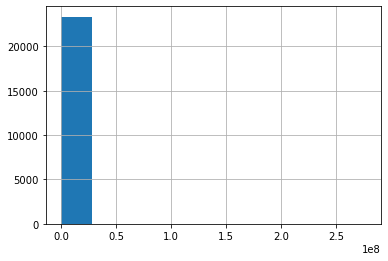

In [24]:
data['sale_price'].hist()

<AxesSubplot:>

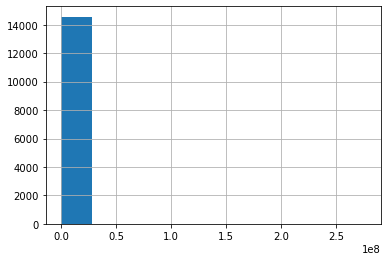

In [25]:
data[data['sale_price'] > 0]['sale_price'].hist()

<AxesSubplot:>

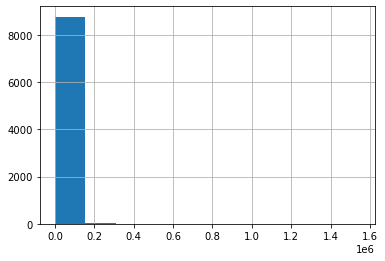

In [26]:
data[data['sale_price'] == 0]['gross_square_feet'].hist()

## Working with a subset of the data
### Question 10 - Filter the data by family homes

In [27]:
is_family = lambda x: str(x).upper().count('FAMILY') > 0

In [28]:
family_homes = data[data['building_class_category'].apply(is_family)]

### Create a log scatter plot of “gross sqft” vs “sale price” for family homes

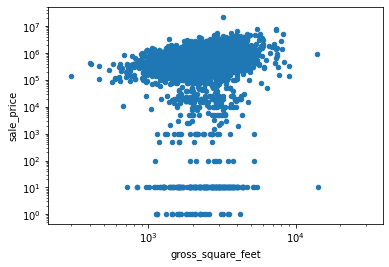

In [29]:
family_plot_1 = family_homes.plot.scatter('gross_square_feet', 'sale_price')
family_plot_1.set_yscale('log')
family_plot_1.set_xscale('log')

### Return a subset of family homes where sale price<100000. How many homes fall in this category?

In [30]:
cheap_family_homes = family_homes[family_homes['sale_price'] < 100000]
cheap_family_homes.shape[0]

4745

### Return a count of the sale prices (Notice that some homes were sold for 1 dollar, etc. These seem to be outliers)

In [31]:
cheap_family_homes['sale_price'].value_counts().sort_index()

0        4306
1          27
10        174
100        10
500         6
         ... 
92500       1
95000       4
97500       1
98000       1
99000       2
Name: sale_price, Length: 82, dtype: int64

### Remove outliers of sales with sale price <= 5

In [32]:
no_outliers_cheap = cheap_family_homes[cheap_family_homes['sale_price'] > 5]

### With the outliers removed, create a plot of “gross sqft” vs “sale price”

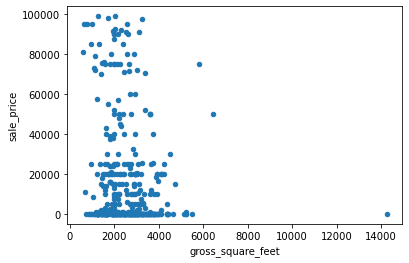

In [33]:
family_plot_2 = no_outliers_cheap.plot.scatter('gross_square_feet', 'sale_price')

### Question 16 - Create a plot of the top 10 home sales for family homes

In [34]:
no_outliers = family_homes[family_homes['sale_price'] > 5]
top_10 = no_outliers['sale_price'].value_counts()[:10]
type(top_10)

pandas.core.series.Series

In [35]:
top_10_df = pd.DataFrame({'price': top_10.index,
                          'count': top_10.array})

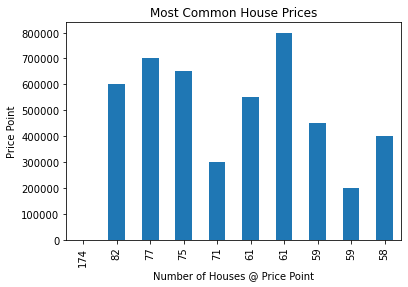

In [36]:
top_10_df.plot(x='count',y='price',kind='bar', xlabel="Number of Houses @ Price Point", ylabel="Price Point", legend=False, title="Most Common House Prices");